# 과거 주식 가격 데이터 확보를 위해 지금까지 삽질해 본 것들

요즘은 집에서 컴퓨터에 설치된 HTS 를 통해 주식을 거래하는 것을 넘어서 스마트폰으로 언제든지 어디서든 주식 가격을 확인하고 거래하는게 가능한 세상이다.
또한 각종 증권사들 뿐만 아니라 다른 다양한 곳에서, 예를 들어 트레이딩뷰 같은 곳에서 제공하는 여러 기본 보조지표들을 포함하는 강력한 차트 툴 처럼,
주식 가격 분석에 활용 가능한 여러 기능들을 탑재한 프로그램들을 제공하고 있어 누구나 쉽게 기본적인 가격 데이터 분석을 시작해 볼 수 있다.

하지만 그렇게 제공되는 기능들로는 만족하지 못하고, 대신 자신이 직접 나름대로의 방법으로 데이터를 분석해보고 싶은 사람들은,
아마도 가장 첫번째 난관으로 **주식 가격 데이터를 어떻게 확보해야할지** 부터 고민하게 되지 않을까 생각한다.
그리고 이 문서는 그렇게 나와 비슷하게 이러한 데이터 확보의 난관에 봉착한 사람들에게 내 일련의 삽질 경험을 공유함으로써 약간이나마 도움이 되었으면 하는 마음에서 적어보려고 한다.

## 1. 우리에게 친숙한 포털의 금융 주제 페이지

여기저기 찾다보면 비교적 가장 먼저, 그러고 쉽게 먼저 접할 수 있는 데이터 소스중 하나지 않을까 싶다.

* [네이버 금융 > 시세 탭 > 일별 시세](https://finance.naver.com/item/sise.nhn?code=035420)
* [다음 금융 > 현재가 탭 > 일자별 주가](https://finance.daum.net/quotes/A035420#current/quote)

접근성 측면에서는 좋은 데이터 소스이지만 아쉬운 점들이 몇가지 있다.

* 데이터 다운로드 기능은 따로 제공하지 않고 있다. 따라서 데이터를 다운로드 받기 위해서는 별도의 웹 크롤러를 사용해야 하는 수도 있다.
    * 직접 구현하는 경우 개발이 필요한 번거로움이 있다. 만약에 웹사이트의 구조가 바뀌는 경우.. 일일이 그에 맞춰 크롤러를 수정해주어야 한다.
    * [다른 능력자 분들께서 이미 구현해주신 코드](https://github.com/FinanceData/FinanceDataReader)가 있어서 그냥 가져다가 사용할 수 있으면 한결 다행이다.
        * 사실 엄밀하게 하자면 위의 라이브러리는 HTML 을 파싱하는 방식이 아니라 아예 XML 형태로 결과를 제공하는 내부 API 를 직접 사용하는것으로 보인다.
    * 서비스 제공자가 우리에게 순순히 크롤링을 당해줄 것인지는 또 다른 문제이다. 대량의 데이터를 다운로드 받고자 하는 경우 차단당할 리스크는 더욱 커진다.
* 제공하는 과거 데이터는 일자별 데이터 뿐이다. 만약에 분봉 이하의 더 작은 타임프레임의 데이터가 필요한 경우 이를 얻을 수 없다.
* 데이터를 관리하는 주체마다 데이터의 처리방식이나 보관정책이 조금씩 다를 수 있다. 사용 목적에 따라서 이를 먼저 파악하고 알맞는 데이터 소스를 선택해 다운로드 받아야 할 필요가 있지만 딱히 이에 대해 일일이 자세하게 설명하거나 알려주지는 않는다.
    * 제공하는 가격정보가 수정주가인가? 아니면 수정되지 않은 원래의 가격인가? 수정주가라면 수정주가를 산정하는 기준이나 수식은 어떻게 되어있는가?
        * 다음에서 제공하고 있는 NAVER(035420) 의 2003.01.02 종가는 49,800원 이지만 네이버에서 제공하고 있는 NAVER(035420) 의 2003.01.02 종가는 24,900원 이다. 과연 무엇이 더 정확한 혹은 사용목적에 적합한 가격인가?
    * 제공 주체가 가능한 한 가장 오래된 과거의 데이터까지 저장 및 제공하고 있는가?
        * 네이버는 NAVER(035420) 의 주가를 가장 오래된 2002.10.29 일자까지의 정보를 제공하고 있지만 다음에서는 확인 가능한 가장 오래된 날짜가 2003.01.02 이다.

위의 내용중에 크롤러를 직접 구현해보는건 생각만 해도 머리가 아파서 따로 시도해보지 않았다.

참고로 위에서 언급된 [다른 능력자 분들께서 이미 구현해주신 코드](https://github.com/FinanceData/FinanceDataReader)는 아래처럼 사용이 가능한 정도로만 확인했다. 또한 해당 라이브러리는 내부적으로 네이버측의 주식 가격정보 API 를 활용하고 있는 것을 확인할 수 있었다.

In [1]:
import FinanceDataReader as fdr

In [2]:
code = '035420'

In [3]:
fdr_data = fdr.DataReader(code)

In [4]:
fdr_data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-10-29,7366,7366,7366,7366,20549,NaN
2002-10-30,8244,8244,8152,8245,853638,0.119332
2002-10-31,8369,8570,7641,7835,1320880,-0.049727
2002-11-01,8036,8287,7065,7349,750761,-0.062029
2002-11-04,7281,7331,6804,6981,692165,-0.050075
...,...,...,...,...,...,...
2021-03-15,382000,385500,377500,383000,609496,0.006570
2021-03-16,384500,389500,384000,385500,574082,0.006527
2021-03-17,388000,391500,380500,383500,1200355,-0.005188


## 2. 아니 외국 사이트들은 주가를 다운로드 받을 수 있던데?

주로 해외 자료를 찾다보면 종종 나오는 웹사이트 기반 데이터 소스들로 아래 정도가 있던 걸로 기억한다.

* [Yahoo Finance > Historical Data](https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS)
* [Investing.com > General > Historical Data](https://www.investing.com/equities/nhn-corp-historical-data)

앞선 국내 포털의 금융 주제 웹페이지와 구별되는 특징 중 장점이라고 볼 수 있는게 몇가지 있다.

* 데이터를 다운로드 할 수 있는 버튼을 직접적으로 제공한다.
* 일별 주가 뿐만 아니라 주단위, 월단위 형태의 주가 데이터 또한 얻을 수 있다.

하지만 역시나 한계점은 있다.

* 역시나 제공하는 과거 데이터는 일자별 데이터 뿐이다. 만약에 분봉 이하의 더 작은 타임프레임의 데이터가 필요한 경우 이를 얻을 수 없다.
* 역시나 데이터를 관리하는 주체마다 데이터의 처리방식이나 보관정책이 조금씩 다를 수 있다. 
    * Yahoo Finance 에서는 일반 종가와 수정 종가를 둘 다 제공하고 있지만 역시 해당 값을 어떻게 계산하는지는 알 수 없다.
    * Investing.com 에서 제공하는 NAVER(035420) 의 2011.09.09 기준 종가는 254,340 지만 Yahoo Finance 에서는 50867.44141(Close) 혹은 49895.66797(AdjClose) 이다.
        * 참고로 네이버와 다음에서 확인되는 NAVER(035420) 의 2011.09.09 (일반) 종가는 207,500 이다.
    * Investing.com 의 경우 기간을 최대로 설정하더라도 한번에 가져올 수 있는 데이터의 개수에는 제한이 있어 보인다.
* 다운로드를 자동화 하는 것은 또 다른 이슈다.
    * 다운로드 링크가 일반적인 하이퍼링크로 구현된 경우 해당 API 주소를 역으로 분석해 직접 활용할 수 있겠다.
        * Yahoo Finance 가 이에 해당되어 보인다.
    * Investing.com 은 다운로드 버튼이 자바스크립트 기반으로 동작한다.
        * 리버스 엔지니어링이 상대적으로 어렵게 된다.
        * 최악의 경우 selenium 과 같은 headless web browser 를 활용한 자동화가 필요할 수 있다.
        * Investing.com 의 경우 데이터를 다운로드 받기 위해서는 로그인이 필요하다. 자동화 하는데 있어서 또 하나의 걸림목이다.

비교적 쉬워보이는 Yahoo Finance 출처에 대한 데이터 다운로더 툴을 간단하게 개발해봤는데 다음과 같았다.

In [5]:
import io
import requests
import pandas as pd

class YahooFinanceKrxHistoricalDailyPriceDataDownloader:

    def __init__(self):
        self._headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36',
        }

    def download(self, symbol, start_date=None, end_date=None):
        if start_date is None:
            start_date = pd.Timestamp(1990, 1, 1)
        elif not isinstance(start_date, pd.Timestamp):
            start_date = pd.Timestamp(start_date)
        if end_date is None:
            end_date = pd.Timestamp.now().normalize() + pd.Timedelta(1, unit='day')
        elif not isinstance(end_date, pd.Timestamp):
            end_date = pd.Timestamp(end_date)

        url = 'https://query1.finance.yahoo.com/v7/finance/download/%s.KS' % symbol.upper()
        params = {
            'period1': int(start_date.timestamp()),
            'period2': int(end_date.timestamp()),
            'interval': '1d',
            'events': 'history',
            'includeAdjustedClose': 'true',
        }
        response = requests.get(url, params=params, headers=self._headers)
        df = pd.read_csv(io.BytesIO(response.content), parse_dates=['Date'], index_col='Date')

        return df

In [6]:
yahoo_downloader = YahooFinanceKrxHistoricalDailyPriceDataDownloader()

In [7]:
yahoo_data = yahoo_downloader.download(code)

In [8]:
yahoo_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-10-29,1797.724854,1797.724854,1797.724854,1797.724854,1763.381104,501745.0
2002-10-30,2012.226074,2012.226074,1989.754517,2012.226074,1973.784546,20892185.0
2002-10-31,2042.869141,2091.897949,1865.139526,1912.125488,1875.595947,32327083.0
2002-11-01,1961.154419,2022.440430,1724.181519,1793.639038,1759.373291,18373668.0
2002-11-04,1777.296143,1789.553345,1660.852539,1703.752808,1671.204102,16939411.0
...,...,...,...,...,...,...
2021-03-15,382000.000000,385500.000000,377500.000000,383000.000000,383000.000000,609496.0
2021-03-16,384500.000000,389500.000000,384000.000000,385500.000000,385500.000000,574082.0
2021-03-17,388000.000000,391500.000000,380500.000000,383500.000000,383500.000000,1200355.0


## 3. 일반적인 웹 사이트들은 못써먹겠다. 공식 데이터 관리처에서 데이터를 받아올 수 있을까?

우리나라의 주식 거래 데이터는 당연하게도 [한국거래소(KRX)](http://krx.co.kr/main/main.jsp) 가 관리하고 있다. 이건 약간 TMI 지만 사실 실제 내부적으로 거래소의 전산관련 업무는 [코스콤](https://www.koscom.co.kr/portal/main.do)이라는 회사에서 맡아서 관리하고 있긴 하다.
어찌 되었든 여기서 어떻게 데이터를 받아올수만 있다면 데이터의 신뢰성과 관련해서는 걱정할 필요가 없어 보인다.

### KRX 데이터 상품

여기저기 찾다보니 거래소에서 데이터를 상품으로 팔고 있다는걸 먼저 알아냈다. 가격이 그리 부담스럽지 않다면 데이터를 구매하는게 가장 바람직하지 않을까?

아래 페이지에서 데이터 구입에 대한 안내를 하고 있다.

* [KRX 데이터 구입 안내](https://data.krx.co.kr/contents/MDC/DATA/datasale/index.cmd?viewNm=MDCDATA001)

판매 데이터의 가격을 확인해봤다. 위의 페이지에 첨부된 문서에서 가장 일반적인 *주식 > 일별매매정보 > 유가/코스닥 > 전체항목* 을 먼저 확인해봤다. 가격은 **1년치 30만원**...
단순하게 2000년 부터 시작하는 것으로 가정하고 20년 정도를 구매한다 하면 600만원이다.
만약에 이 데이터를 구매하면 내가 600만원 이상을 벌 수 있을까? 나는 도저히 본전도 못 채울 것 같아서 바로 포기했다.

혹시나 해서 데이터 구입 안내 메뉴 바로 밑의 페이지에서 좀 더 구체적인 견적도 내어봤는데 결과는 아래와 같다.

* 선택형 데이터 > 주식 > 일별 시세정보
* 대상선택: 유가증권
* 기간: 1996.01 ~ 2021.02
* 항목선택: 기본옵션 (OHLCV 포함)
* 예상가격: 3,775,000원

만약에 해당 가격이 부담되지 않는 사람이 있다면 (그 사람은 더이상 주식투자를 하지 않아도 되지 않나 싶지만) 도전해보고 알려주길 바란다.

### KRX 정보데이터 시스템

좀 더 찾다보니 해당 사이트에서 어느정도 기본적인 통계 정보들은 사이트상에서 확인이 가능하도록 제공중인 것을 알게 되었다.

구체적으로 아래 페이지에서 개별종목의 일별 시세추이를 확인할 수 있다. 무려 다운로드도 가능했다!

* [KRX 정보데이터 시스템 > 통계 > 기본 통계 > 주식 > 종목시세 > 개별종목 시세추이](http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020103)

관련해서 [다른 능력자 분들께서 이미 구현해놓으신 코드](https://github.com/FinanceData/FinanceDataReader/blob/b28bfb5f802f7ad5ad8012a59c32553225e40040/krx/data.py)를 참고하면서, 추가적으로 약간의 리버스 엔지니어링을 거쳐 아래와 같은 툴을 개발할 수 있었다.

In [9]:
import requests
import pandas as pd

class KrxHistoricalDailyPriceDataDownloader:

    def __init__(self):
        self._headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36',
        }

        self._stocks = None
        self._stocks_delisted = None

        self._bld = 'dbms/MDC/STAT/standard/MDCSTAT01701'

    def get_stocks(self):
        data = {
            'mktsel': 'ALL',
            'typeNo': '0',
            'searchText': '',
            'bld': 'dbms/comm/finder/finder_stkisu',
        }
        url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
        response = requests.post(url, data, headers=self._headers)
        df = pd.json_normalize(response.json()['block1'])
        df = df.set_index('short_code')
        return df

    def get_stocks_delisted(self):
        data = {
            'mktsel': 'ALL',
            'searchText': '',
            'bld': 'dbms/comm/finder/finder_listdelisu',
        }
        url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
        response = requests.post(url, data, headers=self._headers)
        df = pd.json_normalize(response.json()['block1'])
        df = df.set_index('short_code')
        return df

    @property
    def stocks(self):
        if self._stocks is None:
            self._stocks = self.get_stocks()
        return self._stocks

    @property
    def stocks_delisted(self):
        if self._stocks_delisted is None:
            self._stocks_delisted = self.get_stocks_delisted()
        return self._stocks_delisted

    def get_full_code(self, symbol):
        if symbol in self.stocks.index:
            return self.stocks.loc[symbol]['full_code']
        if symbol in self.stocks_delisted.index:
            return self.stocks_delisted.loc[symbol]['full_code']
        raise ValueError('No full_code found for given symbol %s' % symbol)

    def download(self, symbol, start_date=None, end_date=None):
        if start_date is None:
            start_date = pd.Timestamp(1990, 1, 1)
        if end_date is None:
            end_date = pd.Timestamp.now().normalize() + pd.Timedelta(1, unit='day')

        full_code = self.get_full_code(symbol)

        url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
        data = {
            'bld': self._bld,
            'isuCd': full_code,
            'isuCd2': '',
            'strtDd': start_date.strftime("%Y%m%d"),
            'endDd': end_date.strftime("%Y%m%d"),
            'share': '1',
            'money': '1',
            'csvxls_isNo': 'false',
        }
        response = requests.post(url, data, headers=self._headers)
        df = pd.json_normalize(response.json()['output'])

        column_names = {
            'TRD_DD':'Date',
            'ISU_CD':'Code',
            'ISU_NM':'Name',
            'MKT_NM':'Market',
            'SECUGRP_NM':'SecuGroup',
            'TDD_CLSPRC':'Close',
            'FLUC_TP_CD':'UpDown',
            'CMPPRVDD_PRC':'Change',
            'FLUC_RT':'ChangeRate',
            'TDD_OPNPRC':'Open',
            'TDD_HGPRC':'High',
            'TDD_LWPRC':'Low',
            'ACC_TRDVOL':'Volume',
            'ACC_TRDVAL':'Amount',
            'MKTCAP':'MarCap',
            'CMPPREVDD_PRC': 'Change',
            'LIST_SHRS': 'Shares',
        }
        df = df.rename(columns=column_names)

        df['Date'] = pd.to_datetime(df['Date'])
        df['ChangeRate'] = pd.to_numeric(df['ChangeRate'])

        int_columns = [
            'Close',
            'UpDown',
            'Change',
            'Open',
            'High',
            'Low',
            'Volume',
            'Amount',
            'MarCap',
            'Shares'
        ]

        for col in int_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
                
        df = df.set_index('Date')

        return df

In [10]:
krx_downloader = KrxHistoricalDailyPriceDataDownloader()

In [11]:
krx_data = krx_downloader.download(code)

In [12]:
krx_data

,Close,UpDown,Change,ChangeRate,Open,High,Low,Volume,Amount,MarCap,Shares
Date,,,,,,,,,,,
2021-03-19,402000,2,-1500,-0.37,397000,407500,395000,1258199,505530602611,66033884790000,164263395
2021-03-18,403500,1,20000,5.22,388500,410000,386500,1818409,728874584340,66280279882500,164263395
2021-03-17,383500,2,-2000,-0.52,388000,391500,380500,1200355,462797585500,62995011982500,164263395
2021-03-16,385500,1,2500,0.65,384500,389500,384000,574082,221455755500,63323538772500,164263395
2021-03-15,383000,1,2500,0.66,382000,385500,377500,609496,232530367000,62912880285000,164263395
...,...,...,...,...,...,...,...,...,...,...,...
2002-11-04,41700,2,-2200,-5.01,43500,43800,40650,692165,28951746850,310124985000,7437050
2002-11-01,43900,2,-2900,-6.20,48000,49500,42200,750761,34432026050,326486495000,7437050
2002-10-31,46800,2,-2450,-4.97,50000,51200,45650,1320880,63979249600,348053940000,7437050


해당 출처의 데이터를 사용하면 아래와 같은 장점이 있다고 생각한다.

* 가장 공식적인 데이터이다.
* 그렇기 때문에 데이터의 정확도와 관련해서 가장 신뢰할 수 있는 출처이지 않을까 싶다.

다만 아래는 조금은 아쉬운 부분이다.

* 역시나 제공하는 과거 데이터는 일자별 데이터 뿐이다. 만약에 분봉 이하의 더 작은 타임프레임의 데이터가 필요한 경우 별도로 돈을 주고 데이터를 사야 한다.
* 위에서 제공중인 페이지에서는 수정주가는 따로 제공되지 않는다. 필요하다면 별도로 계산을 해줘야 한다.

필자는 혹시나 매번 각 종목에 대한 전체 일자에 대한 데이터를 받아오는 것이 거래소의 서버에 부담이 되지 않을까 우려해,
아래처럼 로컬에 데이터를 저장하고 정말 필요한 경우에만 최신 데이터를 요청해 덧붙여 나가는 식으로 추가적으로 구현해 사용 중이다.
수정주가가 아닌 액면 그대로의 주가 데이터를 다루다 보니 과거의 데이터는 별도 오류로 인한 수정이 필요하지 않는 이상 갱신할 필요가 없어서 가능한 동작이다.

In [13]:
import pandas as pd

from sqlalchemy import create_engine, inspect
from sqlalchemy import Table, MetaData

from exchange_calendars import get_calendar
from tqdm import tqdm

class KrxHistoricalDailyPriceDataLoader:

    def __init__(self, filename):
        self._downloader = KrxHistoricalDailyPriceDataDownloader()
        self._engine = create_engine('sqlite:///' + filename)
        self._inspector = inspect(self._engine)
        self._calendar = get_calendar('XKRX')

    def load_naive(self, symbol):
        data = pd.read_sql_table(symbol, self._engine, index_col='Date', parse_dates=['Date'])
        return data

    def load_if_exists(self, symbol):
        if self._inspector.has_table(symbol):
            data = self.load_naive(symbol)
            if data.shape[0] > 0:
                return data

    def load_or_download(self, symbol, start_date=None, end_date=None, save=True):
        if end_date is None:
            now = pd.Timestamp.now(self._calendar.tz)
            end_date = self._calendar.previous_close(now).normalize()
        if self._inspector.has_table(symbol):
            data = self.load_naive(symbol)
            data = data.sort_index()
            if data.shape[0] > 0:
                start_date = data.index.max().tz_localize(self._calendar.tz) + self._calendar.day
                if start_date < end_date:
                    recent_data = self._downloader.download(symbol, start_date, end_date)
                    if recent_data.shape[0] > 0:
                        data = data.combine_first(recent_data)[data.columns]
                        data = data.convert_dtypes(convert_floating=False)
                        data = data.sort_index()
                        if save:
                            data.to_sql(symbol, self._engine, if_exists='replace')
                return data
            else:
                Table(symbol, MetaData()).drop(self._engine)
        if not self._inspector.has_table(symbol):
            if start_date is None:
                start_date = pd.Timestamp(1990, 1, 1)
            data = self._downloader.download(symbol, start_date, end_date)
            data = data.convert_dtypes(convert_floating=False)
            data = data.sort_index()
            if data.shape[0] > 0:
                if save:
                    data.to_sql(symbol, self._engine, if_exists='replace')
                return data

    def load(self, symbol):
        return self.load_or_download(symbol)

    def load_all(self, include_delisted=False, progress_bar=False):
        symbols_with_delisted = {}
        result = {}

        symbols = self._downloader.stocks.index.tolist()
        for symbol in symbols:
            symbols_with_delisted.setdefault(symbol, False)

        if include_delisted:
            symbols = self._downloader.stocks_delisted.index.tolist()
            for symbol in symbols:
                symbols_with_delisted.setdefault(symbol, True)

        now = pd.Timestamp.now(self._calendar.tz)
        end_date = self._calendar.previous_close(now).normalize()

        disable = not progress_bar

        for symbol, _delisted in tqdm(symbols_with_delisted.items(), disable=disable):
            data = self.load_or_download(symbol, end_date=end_date)
            result[symbol] = data

        return result

In [14]:
krx_loader = KrxHistoricalDailyPriceDataLoader('data.sqlite3')

In [15]:
krx_data = krx_loader.load(code)

In [16]:
krx_data

,Close,UpDown,Change,ChangeRate,Open,High,Low,Volume,Amount,MarCap,Shares
Date,,,,,,,,,,,
2002-10-29,44000,4,22000,100.00,44000,44000,44000,20549,904156000,327230200000,7437050
2002-10-30,49250,4,5250,11.93,49250,49250,48700,853638,42030403400,366274712500,7437050
2002-10-31,46800,2,-2450,-4.97,50000,51200,45650,1320880,63979249600,348053940000,7437050
2002-11-01,43900,2,-2900,-6.20,48000,49500,42200,750761,34432026050,326486495000,7437050
2002-11-04,41700,2,-2200,-5.01,43500,43800,40650,692165,28951746850,310124985000,7437050
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,383000,1,2500,0.66,382000,385500,377500,609496,232530367000,62912880285000,164263395
2021-03-16,385500,1,2500,0.65,384500,389500,384000,574082,221455755500,63323538772500,164263395
2021-03-17,383500,2,-2000,-0.52,388000,391500,380500,1200355,462797585500,62995011982500,164263395


## 4. 사실 당연하게도 HTS 에서 데이터를 얻을 수 있다.

키움증권의 영웅문 HTS 기준으로 아래처럼 하면 단일 종목의 과거 가격데이터를 엑셀파일로 저장할 수 있다.

1. 키움증권 영웅문 HTS 실행 및 접속
2. 키움종합차트 창 생성
3. 원하는 종목코드를 입력해 차트 불러오기
4. 필요하다면 우측상단의 톱니버튼을 클릭해 수정주가 적용여부 설정 (기본값은 수정주가 적용)
5. 우측상단의 연속조회 버튼을 최대한 많이 클릭해 최대한 많은 과거 데이터를 불러오기
6. 차트화면 우클릭 후 데이타표 저장 기능 클릭
7. 저장할 항목 설정 창에서 원하는 항목 체크 후 확인 버튼 클릭
8. 최종적으로 엑셀파일을 원하는 경로에 원하는 이름으로 저장

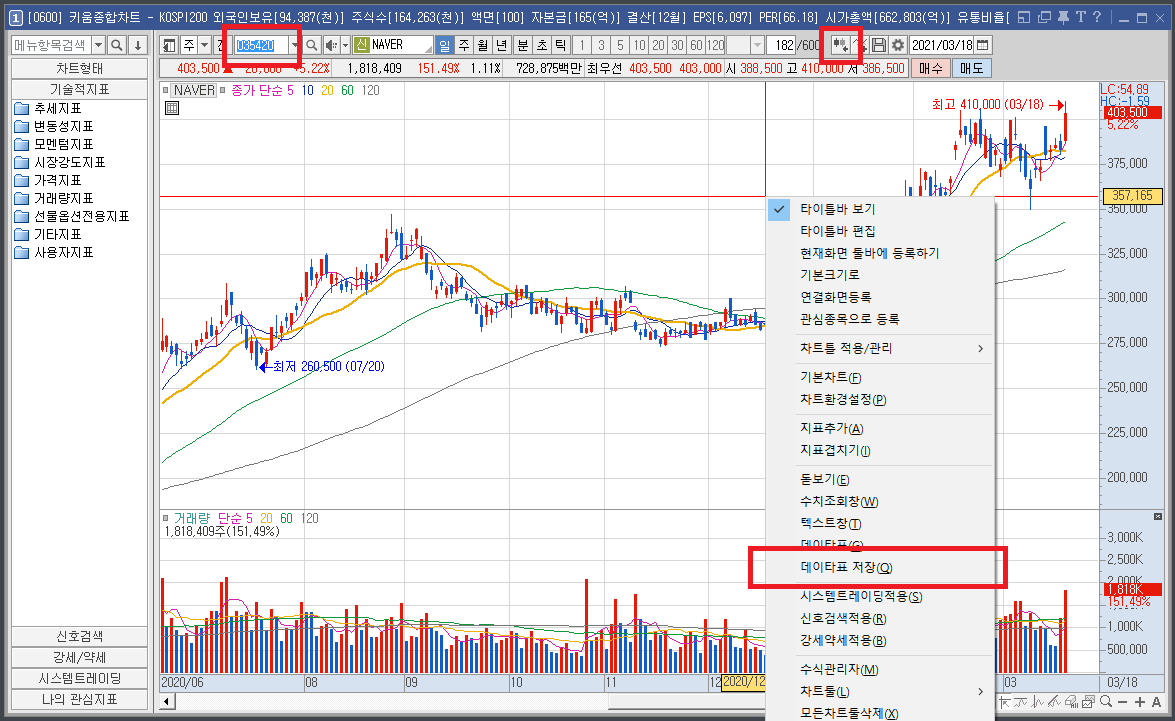

증권사를 통해서 데이터를 받게 되면 아래와 같은 이점을 기대할 수 있다.

* 증권사는 주식 가격데이터의 관리에 관해서는 전문가이다. 충분히 신뢰할 수 있다고 생각한다.
* 수정주가 적용과 관련된 부분도 가장 합리적으로 수정주가를 계산해서 제공하고 있을 것으로 기대할 수 있다.
* 일봉 데이터 뿐만 아니라 다른 다양한 타임프레임의 데이터들도 모두 확인 가능하다.

다만 위와 같은 방식은 아래와 같은 단점이 떠오른다.

* 저걸 단순하게 있는 그대로 자동화 하기 위해서는 거의 자동 매크로와 같은 프로그램이 필요할 듯 하다.

여기서 자연스럽게 다음 단계로 고려되는 것이 각 증권사에서 제공하는 OpenAPI 와 같은 기능들을 직접 사용하는 것이 되겠다.

## 5. 증권사 API 를 활용해서 데이터를 가져와보자.

맨 처음 시도해볼 증권사 API 를 고를 때, 참고할 자료들이 가장 풍부해 보이는 키움증권의 OpenAPI+ 를 먼저 사용해보기로 마음먹고 개발을 시작했다.
이후 이것저것 삽질하면서 개발을 하다 보니 결론적으로는 `koapy` 를 개발하게 되었다.
개발과정에서의 여러 삽질들은 여기서 설명하자면 너무 길어질듯해 나중에 기회가 되면 이야기를 풀어봤으면 한다.

여기서는 `koapy` 를 사용해서 과거 일봉 데이터를 가져와 다른 데이터들과 한번 비교해본다.

### 키움증권의 OpenAPI+ 활용하기

먼저 현재 환경이 32Bit 환경이 맞는지 확인을 하고 진행할 것이다.

In [17]:
import platform

assert platform.architecture()[0] == '32bit'

로그인 처리와 관련해서는 이미 자동 로그인 설정이 되어있는 것이 좋지만,
그게 아니라면 이후 진행하면서 팝업되는 로그인 창에 수동으로 인증정보를 입력해 로그인을 진행한다.

이제 아래처럼 `koapy` 를 사용해서 과거 일봉 데이터를 가져올 수 있다.

In [18]:
from koapy import KiwoomOpenApiPlusEntrypoint

2021-03-20 03:20:18,558 [DEBUG] Using PySide2 as Qt backend - __init__.py:20


In [19]:
kiwoom_entrypoint = KiwoomOpenApiPlusEntrypoint()

2021-03-20 03:20:22,746 [DEBUG] Testing if client is ready... - KiwoomOpenApiPlusEntrypoint.py:64
2021-03-20 03:20:32,752 [DEBUG] Client is not ready, creating a new server - KiwoomOpenApiPlusEntrypoint.py:67


In [20]:
kiwoom_entrypoint.EnsureConnected()

0

In [21]:
kiwoom_data = kiwoom_entrypoint.GetDailyStockDataAsDataFrame(code)

2021-03-20 03:20:47,787 [DEBUG] Received 600 records from 2021-03-19 00:00:00 to 2018-10-15 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:20:48,188 [DEBUG] Received 600 records from 2018-10-12 00:00:00 to 2016-04-29 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:20:48,543 [DEBUG] Received 600 records from 2016-04-28 00:00:00 to 2013-11-20 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:20:48,918 [DEBUG] Received 600 records from 2013-11-19 00:00:00 to 2011-06-22 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:20:49,280 [DEBUG] Received 600 records from 2011-06-21 00:00:00 to 2009-02-02 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:21:05,760 [DEBUG] Received 600 records from 2009-01-30 00:00:00 to 2006-08-24 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper

In [22]:
kiwoom_data

,종목코드,현재가,거래량,거래대금,일자,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
0,035420,402000,1258199,505531,20210319,397000,407500,395000,,,,,,,
1,,403500,1818409,728875,20210318,388500,410000,386500,,,,,,,
2,,383500,1200355,462798,20210317,388000,391500,380500,,,,,,,
3,,385500,574082,221456,20210316,384500,389500,384000,,,,,,,
4,,383000,609496,232530,20210315,382000,385500,377500,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,,41700,692165,28952,20021104,43500,43800,40650,,,,,,,
4544,,43900,750787,34433,20021101,48000,49500,42200,,,,,,,
4545,,46800,1320880,63979,20021031,50000,51200,45650,,,,,,,
4546,,49250,853638,42030,20021030,49250,49250,48700,,,,,,,


위의 주가는 수정주가가 적용되지 않은 결과이다. 이것을 앞서 KRX 에서 확인했던 데이터와 비교해보자.

In [23]:
import numpy as np

kiwoom_data_close = kiwoom_data.sort_values('일자')['현재가'].astype(int).to_numpy()
krx_data_close = krx_data.sort_index()['Close'].to_numpy()

In [24]:
np.sum(kiwoom_data_close - krx_data_close)

0

차이가 없는 것이 확인된다. 긍정적인 결과이다.

이번에는 수정주가를 확인해보자.

In [25]:
kiwoom_data_adjusted = kiwoom_entrypoint.GetDailyStockDataAsDataFrame(code, adjusted_price=True)

2021-03-20 03:21:06,921 [DEBUG] Received 600 records from 2021-03-19 00:00:00 to 2018-10-15 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:21:23,744 [DEBUG] Received 600 records from 2018-10-12 00:00:00 to 2016-04-29 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:21:24,183 [DEBUG] Received 600 records from 2016-04-28 00:00:00 to 2013-11-20 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:21:24,527 [DEBUG] Received 600 records from 2013-11-19 00:00:00 to 2011-06-22 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:21:24,972 [DEBUG] Received 600 records from 2011-06-21 00:00:00 to 2009-02-02 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper.py:445
2021-03-20 03:21:41,764 [DEBUG] Received 600 records from 2009-01-30 00:00:00 to 2006-08-24 00:00:00 for code 035420 - KiwoomOpenApiPlusServiceClientStubWrapper

In [26]:
kiwoom_data_adjusted

,종목코드,현재가,거래량,거래대금,일자,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
0,035420,402000,1258199,505531,20210319,397000,407500,395000,,,,,,,
1,,403500,1818409,728875,20210318,388500,410000,386500,,,,,,,
2,,383500,1200355,462798,20210317,388000,391500,380500,,,,,,,
3,,385500,574082,221456,20210316,384500,389500,384000,,,,,,,
4,,383000,609496,232530,20210315,382000,385500,377500,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,,1389,20785736,28952,20021104,1449,1459,1354,,,,,,,
4544,,1462,22546156,34433,20021101,1598,1648,1405,,,,,,,
4545,,1558,39666066,63979,20021031,1665,1705,1520,,,,,,,
4546,,1640,25634775,42030,20021030,1640,1640,1622,,,,,,,


맨 처음의 `FinancialDataReader` 가 네이버 금융의 데이터를 가져오고 있고, 해당 데이터는 수정주가가 적용된 데이터이다. 해당 데이터와 값을 비교해보자

In [27]:
import numpy as np

kiwoom_data_adjusted_close = kiwoom_data_adjusted.sort_values('일자')['현재가'].astype(int).to_numpy()
fdr_data_adjusted_close = fdr_data.sort_index()['Close'].to_numpy()

In [28]:
np.sum(kiwoom_data_adjusted_close - fdr_data_adjusted_close)

-136051542

In [29]:
np.mean(kiwoom_data_adjusted_close - fdr_data_adjusted_close)

-29914.587071240105

꽤나 차이가 발생하는 것을 확인할 수 있으며, 이것은 각 데이터 출처에서 수정주가를 계산하는 방식이 다른 것으로 인한 차이이지 않을까 추측해볼 수 있다.

좀 더 시각적으로 확인해보자면 아래처럼 해볼 수 있다.

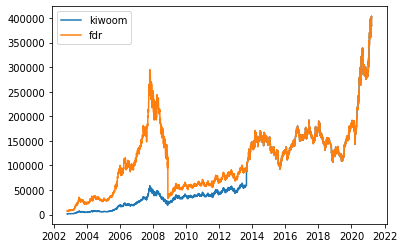

In [30]:
import matplotlib.pyplot as plt

plt.plot(fdr_data.index, kiwoom_data_adjusted_close)
plt.plot(fdr_data.index, fdr_data_adjusted_close)

plt.legend(['kiwoom', 'fdr'])

plt.show()

대략 2013년과 2014년 사이에 뭔 일이 있었는지 급격한 가격변화가 있었고, 해당 시점에서 부터 두 데이터의 가격 차이가 발생하는 것으로 보인다.

사실 해당 시점은 현재 NAVER 의 전신인 당시의 NHN 이 2013.08.01 을 기점으로 NAVER 와 NHN엔터테인먼트 (현재의 NHN) 으로 기업분할을 한 시점이다.
여기서 유추해볼 수 있는건 네이버와 키움증권이 해당 이벤트를 전후해서 수정주가 처리를 다른 방식으로 하고 있다는 것이다.
어느 방식이 더 적절한지에 대해서는 당장은 알 수 없기 때문에 제삼자의 케이스를 추가로 확인해보는게 좋겠다.

내가 알고 있는 것 처럼 `FinancialDataReader` 의 데이터가 수정주가가 아닐 수도 있을 것 같아서 원래 키움증권의 데이터와도 비교해봤다.

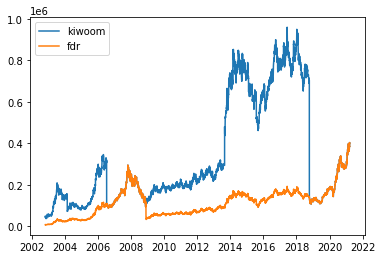

In [31]:
import matplotlib.pyplot as plt

plt.plot(fdr_data.index, kiwoom_data_close)
plt.plot(fdr_data.index, fdr_data_adjusted_close)

plt.legend(['kiwoom', 'fdr'])

plt.show()

꽤나 차이가 크다. 이상하게 2007년부터 2009년 정도까지는 가격이 또 겹치는 구간이 있는거 같은데 뭘까.. 내가 보기에는 원래 수정주가가 최근부터 가장 오래된 시점까지 쭉 이어져서 수정되어야 하지만 여기서는 2009년에 한번 뚝 끊고 다시 거기서부터 수정주가를 적용한듯한 느낌도 든다.

### 대신증권의 Cybos Plus 활용해보기

여기서는 대신증권의 Cybos Plus 를 활용해 수정주가를 가져와 추가적으로 확인해보자.

대신증권 Cybos Plus 의 경우도 마찬가지로 32Bit 환경에서만 사용이 가능하다.

In [32]:
import platform

assert platform.architecture()[0] == '32bit'

앞의 키움증권 케이스와는 다르게 여기서는 자동 로그인과 같은 설정은 따로 없다.
대신에 Cybos Plus 프로그램을 미리 실행 및 로그인까지 진행해두는 것이 필요하다.
미리 실행시켜두지 않았다면 지금 실행하자.

이제 아래처럼 `koapy` 를 사용해서 과거 일봉 데이터를 가져올 수 있다.

In [33]:
from koapy import CybosPlusEntrypoint

In [34]:
cybos_entrypoint = CybosPlusEntrypoint()

In [35]:
cybos_entrypoint.EnsureConnected()

0

In [36]:
cybos_data_adjusted = cybos_entrypoint.GetDailyStockDataAsDataFrame(code, adjusted_price=True)

2021-03-20 03:21:44,698 [DEBUG] Requesting from 2021-03-19 15:30:00+09:00 - CybosPlusEntrypointMixin.py:356
2021-03-20 03:21:44,745 [DEBUG] Requested 2222, received 2221 records - CybosPlusEntrypointMixin.py:360
2021-03-20 03:21:44,798 [DEBUG] Received data from 2021-03-19 00:00:00+09:00 to 2012-03-09 00:00:00+09:00 for code A035420 - CybosPlusEntrypointMixin.py:382
2021-03-20 03:21:44,799 [DEBUG] More data to request remains - CybosPlusEntrypointMixin.py:390
2021-03-20 03:21:44,804 [DEBUG] Trailing rows truncated: 1 - CybosPlusEntrypointMixin.py:398
2021-03-20 03:21:44,804 [DEBUG] Requesting from 2012-03-09 00:00:00+09:00 - CybosPlusEntrypointMixin.py:356
2021-03-20 03:21:44,863 [DEBUG] Requested 2222, received 2221 records - CybosPlusEntrypointMixin.py:360
2021-03-20 03:21:44,917 [DEBUG] Received data from 2012-03-09 00:00:00+09:00 to 2003-04-03 00:00:00+09:00 for code A035420 - CybosPlusEntrypointMixin.py:382
2021-03-20 03:21:44,917 [DEBUG] More data to request remains - CybosPlusEn

In [37]:
cybos_data_adjusted

,날짜,시가,고가,저가,종가,거래량,거래대금,수정주가일자,수정주가비율
0,20210319,397000,407500,395000,402000,1258199,505531000000,20210319,100.00
1,20210318,388500,410000,386500,403500,1818409,728875000000,20210318,100.00
2,20210317,388000,391500,380500,383500,1200355,462798000000,20210317,100.00
3,20210316,384500,389500,384000,385500,574082,221456000000,20210316,100.00
4,20210315,382000,385500,377500,383000,609496,232530000000,20210315,100.00
...,...,...,...,...,...,...,...,...,...
4543,20021104,2282,2298,2133,2188,2208158,28952000000,20021104,5.24
4544,20021101,2518,2597,2214,2303,2395092,34432000000,20021101,5.24
4545,20021031,2623,2686,2395,2455,4213897,63979000000,20021031,5.24
4546,20021030,2584,2584,2555,2584,2723293,42030000000,20021030,5.24


앞서 시각적으로 확인해 봤던 결과에서 위의 케이스를 추가해보자.

In [38]:
cybos_data_adjusted_close = cybos_data_adjusted.sort_values('날짜')['종가'].astype(int).to_numpy()

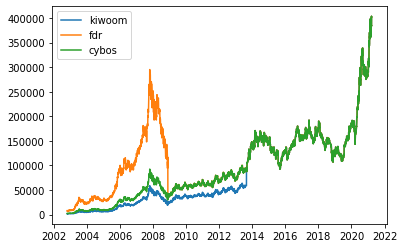

In [39]:
import matplotlib.pyplot as plt

plt.plot(fdr_data.index, kiwoom_data_adjusted_close)
plt.plot(fdr_data.index, fdr_data_adjusted_close)
plt.plot(fdr_data.index, cybos_data_adjusted_close)

plt.legend(['kiwoom', 'fdr', 'cybos'])

plt.show()

키움증권의 OpenAPI+ 와 대신증권의 CybosPlus 사이에서도 데이터 값의 차이가 발생하는 것을 확인할 수 있었다.
대신에 그 둘의 차이가 나머지 `FinancialDataReader` 케이스와의 차이보다 확연하게 적은 것을 봤을 때 `FinancialDataReader` 의 데이터가 약간은 표준에서 동떨어진 데이터가 아닐지 의심해볼 수 있겠다.

### 번외1. 만약에 앞에서 확인했던 Yahoo Financial 의 데이터까지 그려보면 어떻게 될까?

In [40]:
yahoo_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-10-29,1797.724854,1797.724854,1797.724854,1797.724854,1763.381104,501745.0
2002-10-30,2012.226074,2012.226074,1989.754517,2012.226074,1973.784546,20892185.0
2002-10-31,2042.869141,2091.897949,1865.139526,1912.125488,1875.595947,32327083.0
2002-11-01,1961.154419,2022.440430,1724.181519,1793.639038,1759.373291,18373668.0
2002-11-04,1777.296143,1789.553345,1660.852539,1703.752808,1671.204102,16939411.0
...,...,...,...,...,...,...
2021-03-15,382000.000000,385500.000000,377500.000000,383000.000000,383000.000000,609496.0
2021-03-16,384500.000000,389500.000000,384000.000000,385500.000000,385500.000000,574082.0
2021-03-17,388000.000000,391500.000000,380500.000000,383500.000000,383500.000000,1200355.0


In [41]:
yahoo_data_adjusted_close = yahoo_data.sort_index()['Adj Close'].reindex(fdr_data.index).to_numpy()

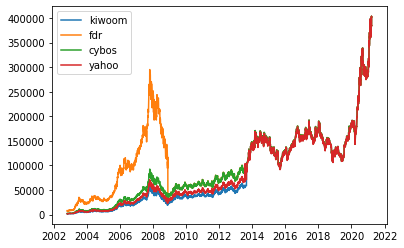

In [42]:
import matplotlib.pyplot as plt

plt.plot(fdr_data.index, kiwoom_data_adjusted_close)
plt.plot(fdr_data.index, fdr_data_adjusted_close)
plt.plot(fdr_data.index, cybos_data_adjusted_close)
plt.plot(fdr_data.index, yahoo_data_adjusted_close)

plt.legend(['kiwoom', 'fdr', 'cybos', 'yahoo'])

plt.show()

무엇이 가장 올바른 수정주가일지는 아직 잘 모르겠지만, 개인적으로는 야후의 데이터도 신뢰가 간다.
야후의 데이터가 키움증권과 대신증권의 데이터의 중간즘에 있어서 더욱 그렇게 보이는 걸지도 모르겠다.
위아래의 둘도 사실은 별다른 이슈 없이 실전에 충분히 활용 가능하지 않을까 하는 생각은 든다.

### 번외2. 만약에 KRX 데이터를 임의로 수정주가 처리해 같이 그려보면 어떻게 될까?

KRX 로 부터 받은 데이터를 어떻게 활용해볼 수 없을까 고민하다가 아래처럼 생각을 해보고 관련 아이디어를 적용해봤다.

* 해당 데이터에서 Change 컬럼을 통해 당일의 주가 변동량을 확인할 수 있다.
* 당일 종가해서 당일 Change 값을 빼면 당일의 기준가를 역산해 확인할 수 있다.
* 위의 방식으로 역산한 기준가와 전일의 종가 사이에 값의 차이가 발생하는 경우 기준가가 알 수 없는 외부 영향으로 인해 인위적으로 변동이 된 것으로 생각할 수 있다.
    * 일반적인 상황에서는 전일의 종가가 자연스럽게 당일의 기준가가 된다.
* 역산한 기준가와 전일 종가 사이의 비율을 통해 수정주가 비율을 추측해볼 수 있겠다고 생각이 들었다.

다만 해당 방식을 나이브하게 여러 종목에 적용해보다가 아래와 같은 문제가 있어서 약간은 무식하게 대응한게 있는데, 구체적으로 아래와 같다.

* KRX 데이터에서는 특정 종목이 과거에 상장폐지 후 다시 상장하는 경우 그 모든 가격 데이터가 하나의 시계열로 저장되는 경우가 있다.
* 위와 같은 경우에 상장폐지와 재 상장 사이를 위와 같은 방식으로 보정하는건 의미가 없다. 오히려 가격을 왜곡시킬 수 있다.
* 데이터상으로 확인해 봤을때 상장폐지 이력이 없는 종목들에서는 가장 긴 연휴가 11일 정도로 확인되었다. 따라서 그보다 긴 공백이 발견되면 상장폐지가 한번 되었던 종목으로 판단하고 구분해 처리한다.

이외에 또 다른 문제가 있을지는 아직까지는 잘 모르겠다.

In [43]:
import datetime
import numpy as np

def get_adjust_ratios(data):
    data = data.sort_index(ascending=False)
    adjust_ratios = []
    last_close = data['Close'].iloc[0]
    last_adjust_ratio = 1.0
    adjust_ratios.append(last_adjust_ratio)
    eleven_days = datetime.timedelta(days=11)
    for i in range(data.shape[0] - 1):
        if data.index[i] - data.index[i+1] > eleven_days:
            last_close = data['Close'].iloc[i+1]
            last_adjust_ratio = 1.0
        else:
            last_close = last_close - data['Change'].iloc[i] * last_adjust_ratio
            last_adjust_ratio = last_close / data['Close'].iloc[i+1]
        adjust_ratios.append(last_adjust_ratio)
    adjust_ratios = np.array(adjust_ratios)
    return adjust_ratios

def adjust_prices(data):
    data = data.sort_index(ascending=False)
    adjust_ratios = get_adjust_ratios(data)
    data['Adj Open'] = data['Open'] * adjust_ratios
    data['Adj High'] = data['High'] * adjust_ratios
    data['Adj Low'] = data['Low'] * adjust_ratios
    data['Adj Close'] = data['Close'] * adjust_ratios
    data['Adj Volume'] = data['Volume'] / adjust_ratios
    return data

In [44]:
krx_data_adjusted = adjust_prices(krx_data)

In [45]:
krx_data_adjusted

,Close,UpDown,Change,ChangeRate,Open,High,Low,Volume,Amount,MarCap,Shares,Adj Open,Adj High,Adj Low,Adj Close,Adj Volume
Date,,,,,,,,,,,,,,,,
2021-03-19,402000,2,-1500,-0.37,397000,407500,395000,1258199,505530602611,66033884790000,164263395,397000.000000,407500.000000,395000.000000,402000.000000,1.258199e+06
2021-03-18,403500,1,20000,5.22,388500,410000,386500,1818409,728874584340,66280279882500,164263395,388500.000000,410000.000000,386500.000000,403500.000000,1.818409e+06
2021-03-17,383500,2,-2000,-0.52,388000,391500,380500,1200355,462797585500,62995011982500,164263395,388000.000000,391500.000000,380500.000000,383500.000000,1.200355e+06
2021-03-16,385500,1,2500,0.65,384500,389500,384000,574082,221455755500,63323538772500,164263395,384500.000000,389500.000000,384000.000000,385500.000000,5.740820e+05
2021-03-15,383000,1,2500,0.66,382000,385500,377500,609496,232530367000,62912880285000,164263395,382000.000000,385500.000000,377500.000000,383000.000000,6.094960e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-11-04,41700,2,-2200,-5.01,43500,43800,40650,692165,28951746850,310124985000,7437050,2323.201639,2339.223720,2170.991877,2227.069158,1.296021e+07
2002-11-01,43900,2,-2900,-6.20,48000,49500,42200,750761,34432026050,326486495000,7437050,2563.532843,2643.643245,2253.772625,2344.564413,1.405737e+07
2002-10-31,46800,2,-2450,-4.97,50000,51200,45650,1320880,63979249600,348053940000,7437050,2670.346712,2734.435033,2438.026548,2499.444522,2.473237e+07


In [46]:
krx_data_adjusted_close = krx_data_adjusted.sort_index()['Adj Close'].reindex(fdr_data.index).to_numpy()

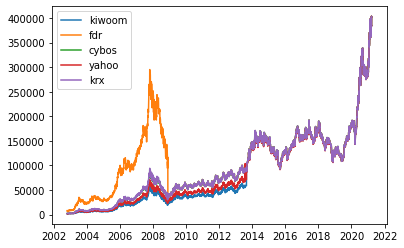

In [47]:
import matplotlib.pyplot as plt

plt.plot(fdr_data.index, kiwoom_data_adjusted_close)
plt.plot(fdr_data.index, fdr_data_adjusted_close)
plt.plot(fdr_data.index, cybos_data_adjusted_close)
plt.plot(fdr_data.index, yahoo_data_adjusted_close)
plt.plot(fdr_data.index, krx_data_adjusted_close)

plt.legend(['kiwoom', 'fdr', 'cybos', 'yahoo', 'krx'])

plt.show()

놀랍게도 수정한 KRX 데이터가 앞서 대신증권 Cybos Plus 를 활용해 받은 수정주가 데이터를 거의 가려버리는 형국으로 보인다.
아마도 대신증권에서는 수정주가 계산시 내가 위에서 생각해낸 아이디어와 거의 비슷한 방향으로 접근하고 있는건 아닐지 조심스레 추측해본다.

## 6. 그래서 과거 주식 가격 데이터를 지속적으로 업데이트 하는데에 있어서 가장 좋은 방법은 뭘까?

일단 당장 자신있게 내릴 수 있는 결론 하나는 다음과 같다.

> 아래의 조건에 만족하는 경우 KRX 의 데이터를 활용한다.
> * 수정주가는 필요없다.
> * 일봉보다 작은 타임프레임의 가격 데이터는 필요없다.

그 다음으로 아래도 생각해볼 수 있겠다.

> 아래의 조건에 만족하는 경우 Yahoo Finance 의 데이터를 활용한다.
> * 일봉보다 작은 타임프레임의 가격 데이터는 필요없지만 수정주가는 필요하다.
> * 증권사 API 를 사용하는건 너무 번거로운 것 같다.

당장 Yahoo Finance 를 사용하지 말아야 할 이유는 떠오르지 않지만, 만약에 Yahoo Finance 는 싫은데 일봉 단위 수정주가가 필요한 경우, 차선책으로 KRX 데이터로부터 직접 수정주가를 생성하는 방식도 어느정도 유효하지 않을까 싶은 생각이다. 이 경우 자신이 직접 수정주가를 처리하는 것에 대한 리스크는 어느정도 감수해야 한다. (개인적으로 그리 크게 리스크가 있을 것 같지는 않다는 생각이다.)

> 아래의 조건에 만족하는 경우 KRX 의 데이터에 기반해 직접 수정주가 처리를 해서 활용한다.
> * 일봉보다 작은 타임프레임의 가격 데이터는 필요없지만 수정주가는 필요하다.
> * 증권사 API 를 사용하는건 너무 번거로운 것 같다.
> * 수정주가 처리방식을 내가 직접 관리하고 싶다.
> * 왠지 Yahoo Finance 는 쓰기 싫다.

이외에 일봉보다 작은 타임프레임의 영역으로 들어가게 되면 결국 증권사 API 의 사용은 필수가 된다. 수정주가의 경우는 제공 안하는 증권사를 찾는게 더 어렵지 않을까 싶다.

여기서 고려했던 두 증권사 API 말고도 다른 다양한 API 가 있겠지만, 먼저 고려했던 둘 중에 하나를 고르자면, 적어도 주식 가격데이터 확보의 관점에서는, 개인적으로 대신증권의 Cybos Plus 를 권하고 싶다. 구체적인 이유는 다음과 같다.

1. Cybos Plus 가 속도 측면에서 압도적으로 빠르다.
    * 모든 증권사 API 는 과도한 요청을 제한하기 위해 시간당 API 요청 횟수의 제한을 두는데 상대적으로 Cybos Plus 가 훨씬 느슨하게 제한을 하고 있다.
    * 키움증권의 OpenAPI+ 의 경우 표면적으로 1초당 5회라고 이야기하고 있지만 내부적으로는 길게 봤을때 1시간당 1000회로, 거의 4초당 1회 꼴로 제한을 두고 있다.
        * 그러면서 1회 호출마다 확보 가능한 레코드 수는 600건 정도에 불과하다.
            * 일봉 데이터 기준 단순 속도를 계산해보면 **150일/초** 정도가 된다. 
    * 반면에 대신증권의 Cybos Plus 는 단순하게 15초에 60회, 나눠보면 1초에 4회 정도까지 호출이 가능하다.
        * Cybos Plus 는 요청시에 필요한 컬럼들만 가져오도록 설정이 가능하다.
        * Cybos Plus 는 1회 요청에서 결과 테이블 내 전체 셀 개수의 총량을 제한하는 식으로 트래픽을 조절하고 있다.
        * 위의 두가지 성격으로 인해 1회 호출시에 확보 가능한 레코드 수는 요청하는 컬럼수에 반비례하게 된다.
        * 따라서 정말 필요한 컬럼들로만 제한해 호출하는 경우 속도는 더욱 빨라질 수 있다.
        * 일반적인 컬럼들로 설정했다고 가정했을때 1회 호출마다 대략 2000건의 레코드를 받을 수 있다.
            * 일봉 데이터 기준 단순 속도를 계산해보면 **8000일/초** 정도가 된다. 대략 키움증권 OpenAPI+ 의 **50배**가 되는 속도이다.
2. Cybos Plus 가 지원하는 확인 가능한 과거 데이터의 기간도 더 길다.
    * 더 과거의 데이터를 확인할 수 있다는 의미다.
    * 만약에 최대한 많은 데이터를 확보하려는 입장이라면 유의미한 차이로 볼 수 있다.
3. 요청시에 필요한 컬럼들만 가져오도록 설정 가능한 부분이 유용하게 사용될 수 있다. 예를 들어 아래와 같은 구성이 가능하다.
    1. 일별 타임프레임하에 수정주가비율 관련 정보만 요청해 주기적으로 업데이트 한다.
        * 수정주가가 하루 단위보다 더 잘게 나뉘어서 적용되지는 않기 때문에 일별 타임프레임으로 저장하면 된다.
        * 해당 정보는 매번 전체 업데이트를 거쳐도 된다. 필요한 컬럼만 요청하기 때문에 비교적 빠르게 값을 갱신하는 것이 가능하다.
        * 주기적으로 업데이트 처리를 하는게 가능하다면 효율성 측면에서 아래처럼 처리할 수도 있어 보인다.
            1. 업데이트시 현재 로컬에 가지고 있는 데이터 기준으로 가장 최근의 영업일과 중복되는/겹쳐지는 결과가 되도록 기간을 설정해 API 를 통해 수정주가비율을 요청한다.
                * 매일 업데이트 하는 경우 기간을 최근 2영업일로 설정해 요청하면 된다.
            2. 겹치게 되는 영업일의 수정주가비율에서 차이가 발생하게 되면 전체 기간에 대한 업데이트를 진행한다.
                * 만약에 차이가 없으면 겹치는 날짜를 제외한 나머지 신규 데이터만 추가한다.
                * 차이가 발생하는 경우의 기존 과거기간 전체에 대한 업데이트는 아래와 같은 방식으로도 가능하다.
                    1. 겹치는 영업일에서 기존/신규 수정주가비율 사이의 값의 차이를 비율 형태로 확인한다.
                    2. 기존에 가지고 있던 과거 수정주가비율 전체를 해당 비율만큼 동일하게 조정해준다.
                        * 겹치게 되는 영업일에서 기존 로컬의 수정주가비율이 요청을 통해 받은 신규 수정주가비율 만큼 되도록 조정해주는 것으로 보면 된다.
    2. 다른 필요한 주식 가격 데이터들은 모두 수정주가를 적용하지 않은 버전으로 가져와 로컬에 저장한다.
        * 이 경우 매번 전체 데이터를 업데이트 할 필요 없이 누락된 최신 데이터만 추가로 요청해 덧붙이는 식으로 업데이트가 가능하다.
    3. 이후 수정주가가 필요할때마다 아래와 같이 처리해 사용한다.
        1. 원본주가 데이터를 먼저 로드한다.
        2. 일별 주가수정비율 데이터도 같이 로드한다.
        3. 날짜 기준으로 위의 두 데이터를 조인 후 주가수정비율에 맞게 각 가격의 값을 조정한다.
        
증권사 API 선택방식과 관련해서 정리하자면 아래처럼 될 수 있겠다.

> 아래의 조건에 만족하는 경우 대신증권 Cybos Plus 의 데이터를 활용한다.
> * 분봉 이하를 포함한 다양한 타임프레임의 가격 데이터가 필요하다.
> * 데이터 업데이트를 효율적으로 하고 싶다.
> * 더 많은 기간의 데이터를 확보하는 것이 중요하다.

> 아래의 조건에 만족하는 경우 키움증권 OpenAPI+ 의 데이터를 활용한다.
> * 분봉 이하를 포함한 다양한 타임프레임의 가격 데이터가 필요하다.
> * 업데이트 속도나 효율성은 크게 중요하지 않다.
> * 확보 가능한 과거 데이터의 기간도 크게 중요하지 않다.
> * 여러 증권사 API 를 사용하는게 번거로울 것 같다. 나는 원래 쓰던 키움증권만 쓰련다.

각 증권사마다 수정주가 계산을 다르게 처리하는 것과 관련해서는, 필요하다면 각기 증권사에 문의해본 뒤에 자신에게 맞는 방식을 골라서 사용하면 되지 않을지 하는 생각이다.

### Cybos Plus 를 활용한 수정주가 별도 관리 방식의 구체적인 예시

위의 Cybos Plus 의 장점을 설명하는 내용중 마지막 3번에서 설명했던 방식을 좀 더 구체적인 예시를 들어보자면 아래와 같다.

In [48]:
adjustment_ratios = cybos_entrypoint.GetDailyAdjustmentRatioAsDataFrame(code)

2021-03-20 03:21:46,038 [DEBUG] Requesting from 2021-03-19 15:30:00+09:00 - CybosPlusEntrypointMixin.py:356
2021-03-20 03:21:46,090 [DEBUG] Requested 6666, received 4548 records - CybosPlusEntrypointMixin.py:360
2021-03-20 03:21:46,135 [DEBUG] Received data from 2021-03-19 00:00:00+09:00 to 2002-10-29 00:00:00+09:00 for code A035420 - CybosPlusEntrypointMixin.py:382
2021-03-20 03:21:46,135 [DEBUG] No more data to request - CybosPlusEntrypointMixin.py:400


In [49]:
adjustment_ratios

,날짜,수정주가일자,수정주가비율
0,20210319,20210319,100.00
1,20210318,20210318,100.00
2,20210317,20210317,100.00
3,20210316,20210316,100.00
4,20210315,20210315,100.00
...,...,...,...
4543,20021104,20021104,5.24
4544,20021101,20021101,5.24
4545,20021031,20021031,5.24
4546,20021030,20021030,5.24


In [50]:
minutes_data = cybos_entrypoint.GetMinuteStockDataAsDataFrame(code, 15)

2021-03-20 03:21:46,159 [DEBUG] Requesting from 2021-03-19 15:30:00+09:00 - CybosPlusEntrypointMixin.py:356
2021-03-20 03:21:46,250 [DEBUG] Requested 2500, received 2499 records - CybosPlusEntrypointMixin.py:360
2021-03-20 03:21:46,303 [DEBUG] Received data from 2021-03-19 00:00:00+09:00 to 2020-10-28 00:00:00+09:00 for code A035420 - CybosPlusEntrypointMixin.py:382
2021-03-20 03:21:46,303 [DEBUG] More data to request remains - CybosPlusEntrypointMixin.py:390
2021-03-20 03:21:46,307 [DEBUG] Trailing rows truncated: 7 - CybosPlusEntrypointMixin.py:398
2021-03-20 03:21:46,308 [DEBUG] Requesting from 2020-10-28 00:00:00+09:00 - CybosPlusEntrypointMixin.py:356
2021-03-20 03:21:46,385 [DEBUG] Requested 2500, received 2499 records - CybosPlusEntrypointMixin.py:360
2021-03-20 03:21:46,438 [DEBUG] Received data from 2020-10-28 00:00:00+09:00 to 2020-06-09 00:00:00+09:00 for code A035420 - CybosPlusEntrypointMixin.py:382
2021-03-20 03:21:46,438 [DEBUG] More data to request remains - CybosPlusEn

In [51]:
minutes_data

,날짜,시간,시가,고가,저가,종가,거래량,거래대금
0,20210319,1530,400000,402000,399500,402000,198603,79805120000
1,20210319,1515,402000,402500,399500,399500,49212,19725460000
2,20210319,1500,401500,402500,401000,402000,25561,10270920000
3,20210319,1445,402500,402500,401000,401500,26055,10463540000
4,20210319,1430,402500,403000,400500,402000,25256,10144830000
...,...,...,...,...,...,...,...,...
32169,20160217,1015,579000,582000,578000,581000,5774,3351410000
32170,20160217,1000,576000,579000,575000,579000,6294,3630860000
32171,20160217,945,579000,583000,575000,576000,8363,4854990000
32172,20160217,930,583000,584000,577000,579000,6269,3637300000


In [52]:
adjusted_minutes_data = pd.merge(minutes_data, adjustment_ratios, on='날짜', how='left')

In [53]:
adjusted_minutes_data

,날짜,시간,시가,고가,저가,종가,거래량,거래대금,수정주가일자,수정주가비율
0,20210319,1530,400000,402000,399500,402000,198603,79805120000,20210319,100.0
1,20210319,1515,402000,402500,399500,399500,49212,19725460000,20210319,100.0
2,20210319,1500,401500,402500,401000,402000,25561,10270920000,20210319,100.0
3,20210319,1445,402500,402500,401000,401500,26055,10463540000,20210319,100.0
4,20210319,1430,402500,403000,400500,402000,25256,10144830000,20210319,100.0
...,...,...,...,...,...,...,...,...,...,...
32169,20160217,1015,579000,582000,578000,581000,5774,3351410000,20160217,20.0
32170,20160217,1000,576000,579000,575000,579000,6294,3630860000,20160217,20.0
32171,20160217,945,579000,583000,575000,576000,8363,4854990000,20160217,20.0
32172,20160217,930,583000,584000,577000,579000,6269,3637300000,20160217,20.0


In [54]:
price_multiplier = adjusted_minutes_data['수정주가비율'] / 100

In [55]:
price_multiplier

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
32169    0.2
32170    0.2
32171    0.2
32172    0.2
32173    0.2
Name: 수정주가비율, Length: 32174, dtype: float64

In [56]:
adjusted_minutes_data['수정시가'] = adjusted_minutes_data['시가'] * price_multiplier
adjusted_minutes_data['수정고가'] = adjusted_minutes_data['고가'] * price_multiplier
adjusted_minutes_data['수정저가'] = adjusted_minutes_data['저가'] * price_multiplier
adjusted_minutes_data['수정종가'] = adjusted_minutes_data['종가'] * price_multiplier
adjusted_minutes_data['수정거래량'] = adjusted_minutes_data['거래량'] / price_multiplier

In [57]:
adjusted_minutes_data

,날짜,시간,시가,고가,저가,종가,거래량,거래대금,수정주가일자,수정주가비율,수정시가,수정고가,수정저가,수정종가,수정거래량
0,20210319,1530,400000,402000,399500,402000,198603,79805120000,20210319,100.0,400000.0,402000.0,399500.0,402000.0,198603.0
1,20210319,1515,402000,402500,399500,399500,49212,19725460000,20210319,100.0,402000.0,402500.0,399500.0,399500.0,49212.0
2,20210319,1500,401500,402500,401000,402000,25561,10270920000,20210319,100.0,401500.0,402500.0,401000.0,402000.0,25561.0
3,20210319,1445,402500,402500,401000,401500,26055,10463540000,20210319,100.0,402500.0,402500.0,401000.0,401500.0,26055.0
4,20210319,1430,402500,403000,400500,402000,25256,10144830000,20210319,100.0,402500.0,403000.0,400500.0,402000.0,25256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32169,20160217,1015,579000,582000,578000,581000,5774,3351410000,20160217,20.0,115800.0,116400.0,115600.0,116200.0,28870.0
32170,20160217,1000,576000,579000,575000,579000,6294,3630860000,20160217,20.0,115200.0,115800.0,115000.0,115800.0,31470.0
32171,20160217,945,579000,583000,575000,576000,8363,4854990000,20160217,20.0,115800.0,116600.0,115000.0,115200.0,41815.0
32172,20160217,930,583000,584000,577000,579000,6269,3637300000,20160217,20.0,116600.0,116800.0,115400.0,115800.0,31345.0
